In [1]:
import glob,os
import numpy as np
import pandas as pd
import re

# import astropy
import GCRCatalogs as gcr
from astropy.table import Table, setdiff, vstack, join

import matplotlib.pyplot as plt
plt.style.use('MNRAS.mplstyle')

h = 0.71
file_path = r"/global/u1/k/kamau/SE-CLMM-LSSTDESC/project-1/Data/"
filepath = r'/global/u1/k/kamau/SE-CLMM-LSSTDESC/project-1/Notebooks/skysim5000/Depth/calc-richness/DepthData/'
filepath1 = r'/global/u1/k/kamau/SE-CLMM-LSSTDESC/project-1/Notebooks/skysim5000/Depth/calc-richness/DepthData/FixedDepth=60/'

# Load the cylinder richness data of the different depths

In [13]:
def load_and_process_data(file_path, varying_quantity):
    filename = f"RichnessDepth-Data/RichnessDepth_{varying_quantity}_035_05.dat"
    data_unsorted = Table.read(file_path + filename, format='ascii')
    
    data_sorted = Table(np.sort(data_unsorted, order='lam'))[::-1]
    print(f'D{varying_quantity}' ,len(data_sorted), len(np.unique(data_sorted['pixelid'])))
    
    return data_sorted

# Load and process richness data for different depths
clusterRlamC05 = load_and_process_data(filepath1, 'rlamCut05_60')  ### CC=Color Cut
clusterRlamC1 = load_and_process_data(filepath1, 'ColorCut20_60')
clusterRlamC2 = load_and_process_data(filepath1, 'rlamCut2_60')

DrlamCut05_60 274607 1568
DColorCut20_60 273693 1568
DrlamCut2_60 273692 1568


# Load cluster-halos matched (RedMaPPer)

In [14]:
cluster_halos_red = pd.read_pickle(file_path + 'halos/halos_redmapper_withh_mthd2.csv')
print(len(cluster_halos_red))
cluster_halos_red = cluster_halos_red[(cluster_halos_red['redshift']>=0.35) & (cluster_halos_red['redshift']<0.5)]
cluster_halos_red = cluster_halos_red.sort_values(by='richness',ascending=False)
print(len(cluster_halos_red))
cluster_halos_red[:3]

37798
7791


,cluster_id,richness,dec,redshift_1,clusters/z_lambda,clusters/mem_match_id,ra,halo_id,baseDC2/sod_halo_mass,halo_mass,redshift,baseDC2/sod_halo_radius,pixel_id,comoving_dis,Angular_dis,radius,sigma,DS
12449,8,283.304352,-48.635477,0.408346,0.408346,8,36.647026,387810675347,9.464646e+14,1.659895e+15,0.405861,1.971059,10675,1111.686563,790.751602,"[0.13573909765215844, 0.2088776605214819, 0.33...","[1667395545554050.8, 999117086340109.2, 647440...","[-146111734958106.16, -358217093774667.2, -405..."
1667,25,269.696899,-39.456496,0.421540,0.421540,25,30.952695,49010059347,7.557875e+14,1.111478e+15,0.420646,1.828652,10059,1148.090008,808.146283,"[0.12825113863145365, 0.2072021763074542, 0.33...","[1028035767934605.9, 773795640706367.1, 556093...","[34801889736452.812, -8762735299973.348, -2401..."
6886,21,261.199890,-49.252437,0.481522,0.481522,21,60.397077,205510794331,6.594539e+14,1.036123e+15,0.486781,1.788555,10794,1307.411713,879.357581,"[0.12940199905498917, 0.21556486945853923, 0.3...","[1692054261412283.2, 1168227275593436.8, 47180...","[-281722474350221.5, -566377713336343.9, -5870..."


# Load Halos data with Weak lensing profiles

In [15]:
## Sigma and DS profile
sigma_ds_profile = pd.read_pickle(file_path + 'WL-Signal/skysim-full-DS_S-2152757.csv')
print(len(sigma_ds_profile))
sigma_ds_profile[:3]

2152757


,baseDC2/sod_halo_mass,baseDC2/sod_halo_radius,redshift,dec,magnification,hostHaloMass,ra,halo_id,halo_mass,pixel_id,comoving_dis,Angular_dis,radius,sigma,DS
0,2.657907e+13,0.544625,0.201397,-40.048467,0.997962,2.996808e+13,0.722143,21510048411,4.220856e+13,10048,578.542239,481.558077,"[0.1308730625060924, 0.20814712387717377, 0.33...","[115148363120795.56, 51872210454439.24, 229531...","[-130550254502468.84, -76217790266760.5, -3994..."
1,1.219647e+13,0.420254,0.202359,-39.682840,0.997031,1.328618e+13,0.668087,25010048411,1.871292e+13,10048,581.180475,483.367013,"[0.13261201512396317, 0.20923342305629689, 0.3...","[7445362739885.1875, 8543016543686.46, -375534...","[-51159678940917.43, -21245333215964.383, -223..."
2,3.727315e+13,0.609587,0.201278,-41.671626,0.997201,4.826852e+13,0.013165,25410048411,6.798383e+13,10048,578.216572,481.334566,"[0.13437702148667455, 0.21206787125180884, 0.3...","[98287762786790.84, 51371879042919.66, -144157...","[-171453712604657.56, -101776907593780.67, -73..."


# Merge halos with clusters (DepthMapper)

In [32]:
# List of cluster tables and suffix values
# clusterRlamC05 = clusterRlamC05.to_pandas()
# clusterRlamC1 = clusterRlamC1.to_pandas()
# clusterRlamC2 = clusterRlamC2.to_pandas()

# List of cluster tables and suffix values
cluster_tables = [clusterRlamC05, clusterRlamC1, clusterRlamC2] 
suffix_values = [ 0.5,1, 2] #, 150, 180, 210   9, 20, 50, 100, 500, '0101', '0303', 11

# Dictionary to store the halo tables dynamically
halo_cluster_tables = {}

# Dictionary to store the halo tables dynamically
halo_cluster_tables = {}

# Iterate over the tables and suffix values
for i, (cluster_table, suffix) in enumerate(zip(cluster_tables, suffix_values), 1):
    halo_table_name = f"cluster_halo_{suffix}"

    # Perform the join and other operations
    halo_table = pd.merge(sigma_ds_profile,cluster_table, left_on='halo_id',right_on='haloid', how='inner').sort_values(by='lam', ascending=False)
    halo_cluster_tables[halo_table_name] = halo_table
    print(f"Length of {halo_table_name}: {len(halo_table)}")

cluster_halo_rlamC05 = halo_cluster_tables['cluster_halo_0.5']
cluster_halo_rlamC1 = halo_cluster_tables['cluster_halo_1']
cluster_halo_rlamC2 = halo_cluster_tables['cluster_halo_2']

Length of cluster_halo_0.5: 274607
Length of cluster_halo_1: 273693
Length of cluster_halo_2: 273692


In [33]:
lamranges = [(20,30), (30,45), (45,60), (60,500)]
lamlabels = ['(20,30]', '(30,45]', '(45,60]', '(60,500]']
cluster_halos_red['lambda_range'] = pd.cut(cluster_halos_red['richness'], bins=[r[0] for r in lamranges] + [lamranges[-1][-1]], labels=lamlabels)

grouped_cl_halos_red = cluster_halos_red.groupby(['lambda_range'])

In [34]:
## Weighted Profile
def stacked_profile_weighted_by_mass_redshift(lnM_select, z_select, prof_select, lnM_all, z_all, profile_A, dm=0.1, dz=0.05):
    #### set up the bins for mass and redshift  (sigma_select/profile_select, sigma_all/profile_all)
    min_m = min(lnM_select)#-dm
    max_m = max(lnM_select)#+dm
    min_z = min(z_select)#-dz
    max_z = max(z_select)#+dz

    # print('z', min_z, max_z)
    m_bins = np.arange(min_m, max_m+dm, dm)
    z_bins = np.arange(min_z, max_z+dz, dz)
    nM = len(m_bins)-1
    nz = len(z_bins)-1
    # print('nM, nz', nM, nz)

    profile_select = np.array([i.tolist() for i in prof_select])
    profile_all = np.array([i.tolist() for i in profile_A])

    nr = np.shape(profile_select)[1]#rbp.nbins_phys_mpc...1
    profile_weighted = np.zeros(nr)
    weight_norm = 0


    pdf1_list = np.zeros([nz, nM]) # see how many bins are too narrow
    pdf2_list = np.zeros([nz, nM]) # see how many bins are too narrow

    for iz in range(nz):
        z_lo = z_bins[iz]
        z_hi = z_bins[iz+1]
        # print(z_lo,z_hi)
        for iM in range(nM):
            m_lo = m_bins[iM]
            m_hi = m_bins[iM+1]
            # print(m_lo, m_hi)
            
            select_bin = (lnM_select >= m_lo)&(lnM_select < m_hi)&(z_select>=z_lo)&(z_select<z_hi)
            weight = len(lnM_select[select_bin]) * 1.
            # print(weight, len(lnM_select[select_bin]),lnM_select[select_bin])
            weight_norm += weight
            # print(weight_norm)
            select_all = (lnM_all >= m_lo)&(lnM_all < m_hi)&(z_all>=z_lo)&(z_all<z_hi)

            pdf1_list[iz, iM] = weight
            # print(pdf1_list)
            pdf2_list[iz, iM] = len(lnM_all[select_all])
            # print(pdf2_list)

            if weight > 0 and len(lnM_all[select_all]) > 0:
                # print(weight, len(lnM_all[select_all]))
                # if weight == len(lnM_all[select_all]):
                    # print('bin is too narrow!')
                profile_weighted += (np.mean(profile_all[select_all, :], axis=0)*weight) #0
                #profile_weighted += np.nan_to_num(np.mean(profile_all[select_all, :], axis=0)*weight)
            #profile_weighted = np.nan_to_num(profile_weighted)
    profile_weighted /= weight_norm

    pdf1_list = np.concatenate(pdf1_list)
    pdf2_list = np.concatenate(pdf2_list)
    diff_list = pdf2_list - pdf1_list
    # print('pdf1==pdf2', len(diff_list[diff_list == 0]), 'out of', len(diff_list))

    return profile_weighted

/global/homes/k/kamau/clmmdesc/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


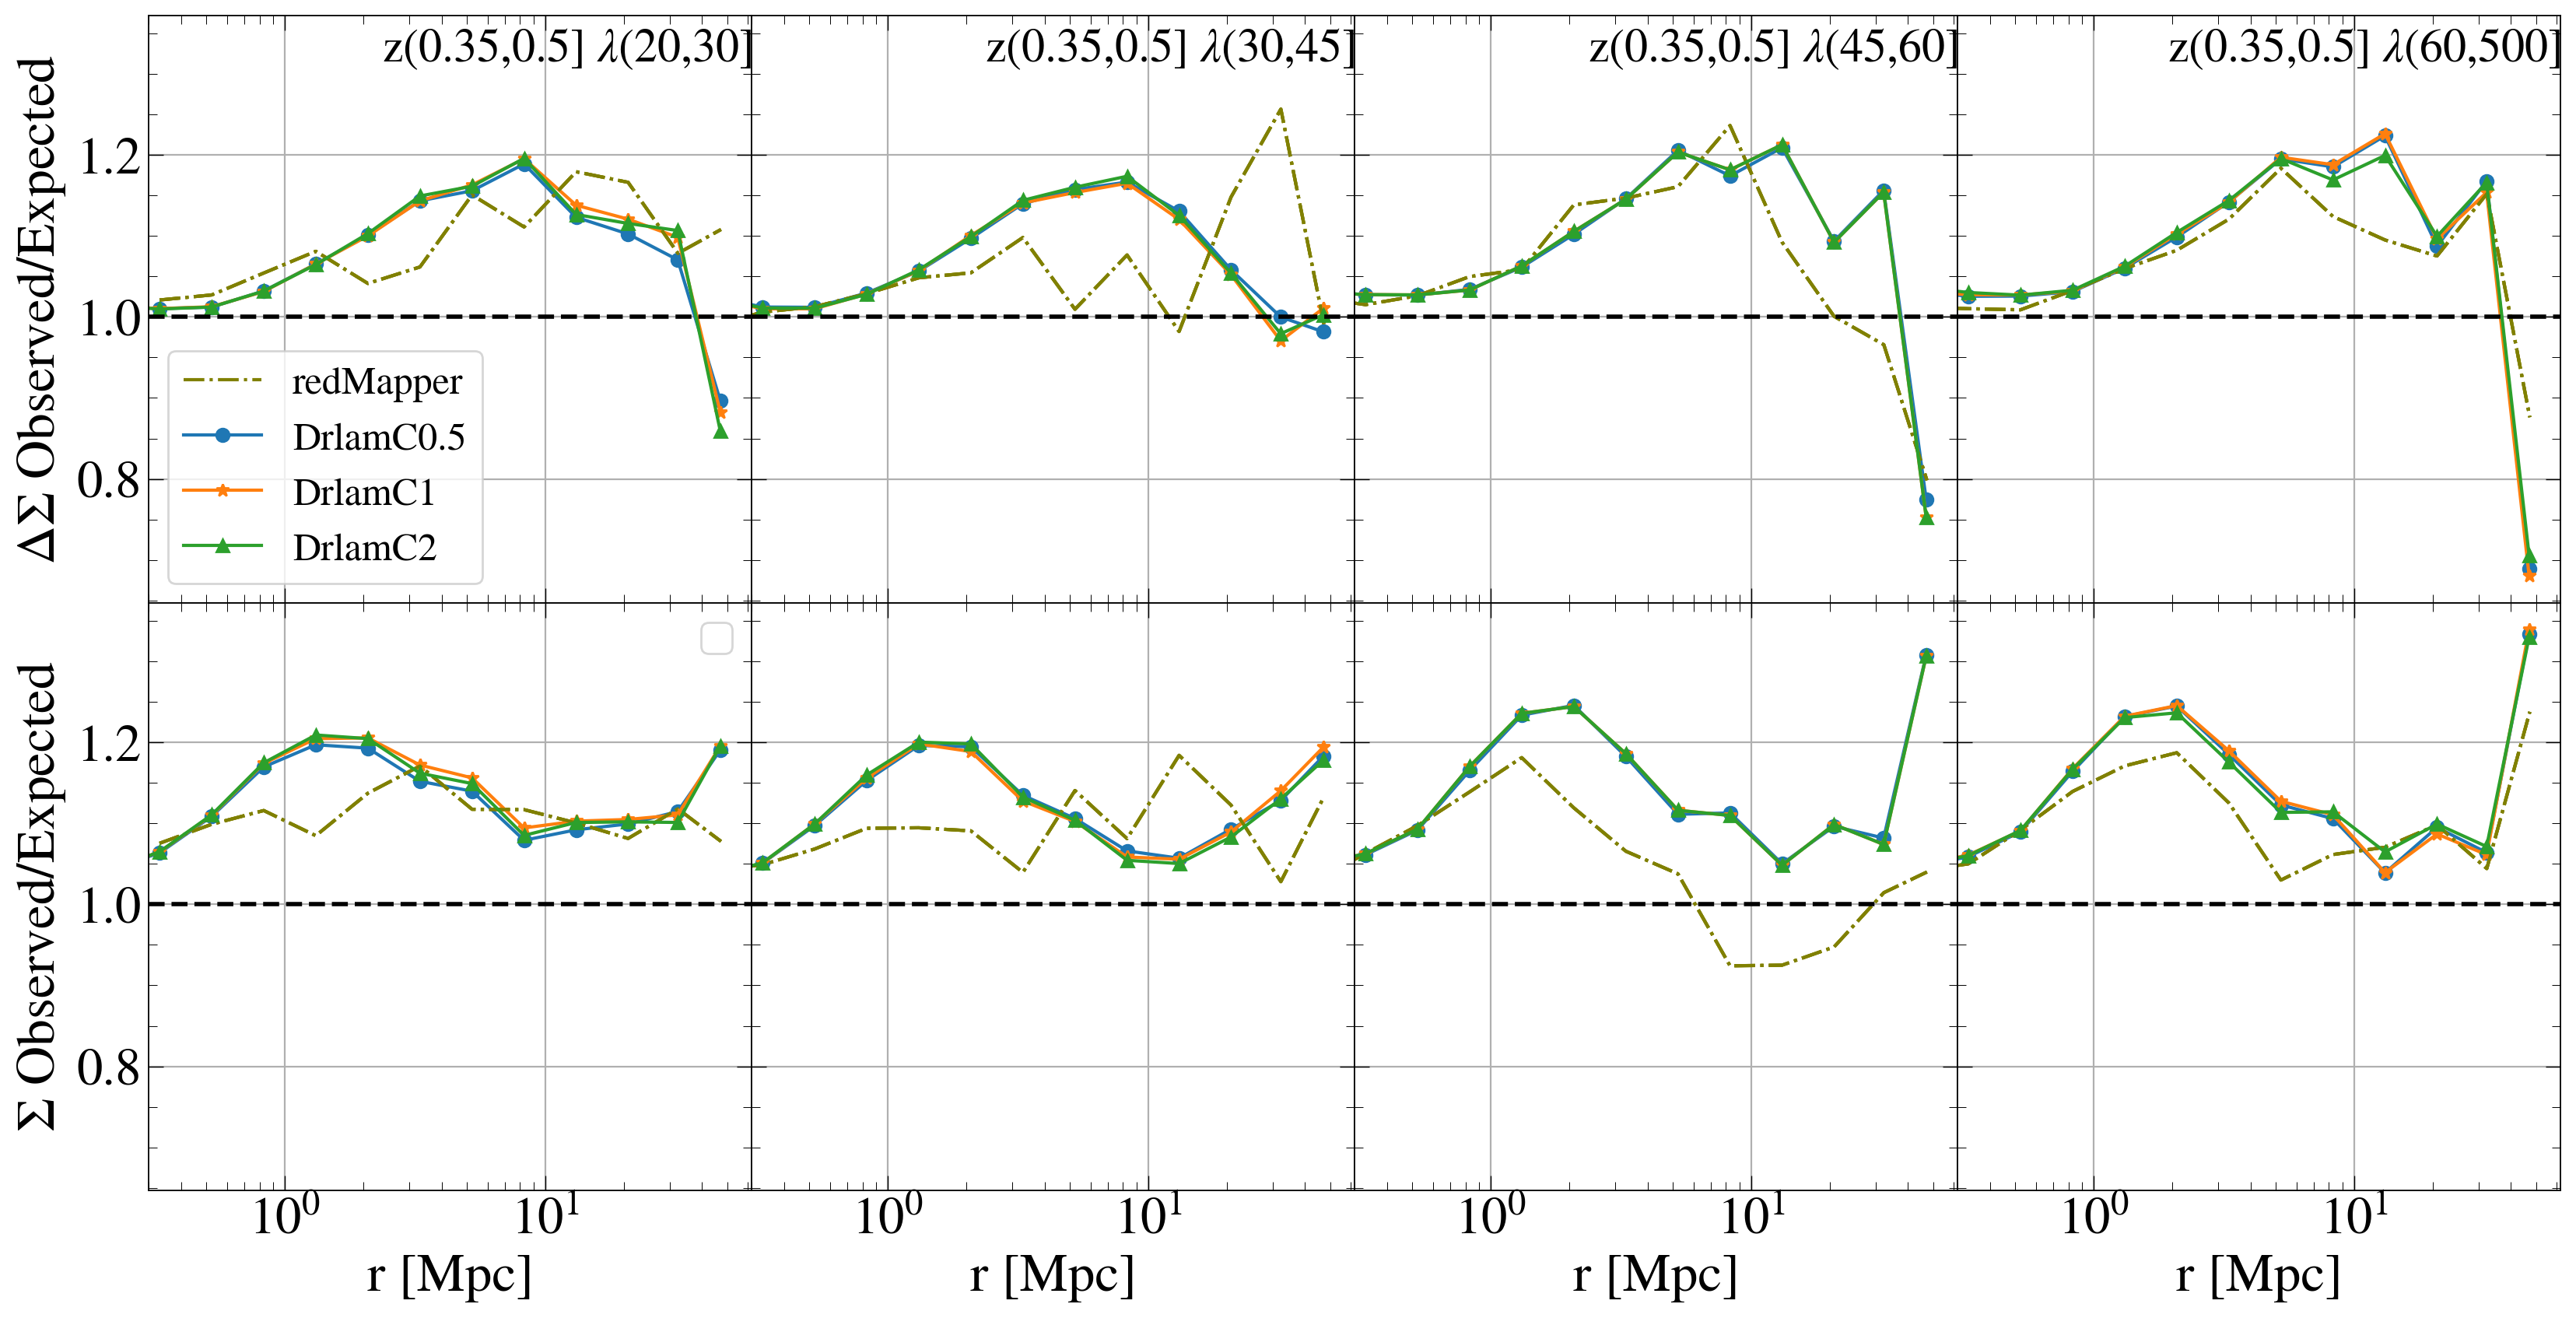

In [35]:
underlying_halos = sigma_ds_profile[(sigma_ds_profile['redshift'] >= 0.35) & (sigma_ds_profile['redshift'] < 0.5)]
lnM_All = np.log10(underlying_halos['baseDC2/sod_halo_mass'])
z_All = underlying_halos['redshift']
profile_All = underlying_halos['sigma']
profile_All_ds = underlying_halos['DS']

# Function to select clusters based on lambda values and calculate ratios
def select_and_calculate_ratios(cluster_halo, num_clusters_in_bin, lnM_All, z_All, profile_All_ds, profile_All):
    sel_clusters = cluster_halo.nlargest(num_clusters_in_bin, 'lam')
    cluster_halo = cluster_halo.drop(sel_clusters.index)
    lnM_sel = np.log10(sel_clusters['baseDC2/sod_halo_mass'])
    z_sel = sel_clusters['redshift_y']
    profile_sel = sel_clusters['sigma']
    profile_sel_ds = sel_clusters['DS']

    expected_ds = stacked_profile_weighted_by_mass_redshift(lnM_sel, z_sel, profile_sel_ds, lnM_All, z_All, profile_All_ds)
    expected_sigma = stacked_profile_weighted_by_mass_redshift(lnM_sel, z_sel, profile_sel, lnM_All, z_All, profile_All)

    ratio_ds = np.array(profile_sel_ds.mean(axis=0)) / np.array(expected_ds)
    ratio_sigma = np.array(profile_sel.mean(axis=0)) / np.array(expected_sigma)
    radius = sel_clusters['radius'].mean()
    return radius, ratio_ds, ratio_sigma

# Create a figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)
# 'CC9', 'CC20', 'CC50', 'CC100', 'CC500','ZC0101', 'ZC0303', 'ZC11'
D = ['rlamC0.5', 'rlamC1', 'rlamC2'] #'0.1-20','0.5-20', '1-100' #1, 30, 60, 90, 120
markers = ['o', '*', '^'] # , 'D', 'P', '*', 'X', 'v'

for lambda_group in sorted(grouped_cl_halos_red.groups.keys(), reverse=True):
    sel_clusters_red = grouped_cl_halos_red.get_group(lambda_group)
    lnM_sel_red = np.log10(sel_clusters_red['baseDC2/sod_halo_mass'])
    z_sel_red = sel_clusters_red['redshift']
    profile_sel_red = sel_clusters_red['sigma']
    profile_sel_ds_red = sel_clusters_red['DS']
    
    
    num_clusters_in_bin = len(sel_clusters_red)
    
    expected_ds_red = stacked_profile_weighted_by_mass_redshift(lnM_sel_red, z_sel_red, profile_sel_ds_red, lnM_All, z_All, profile_All_ds)
    expected_sigma_red = stacked_profile_weighted_by_mass_redshift(lnM_sel_red, z_sel_red, profile_sel_red, lnM_All, z_All, profile_All)

    ratio_ds_red = np.array(profile_sel_ds_red.mean(axis=0)) / np.array(expected_ds_red)
    ratio_sigma_red = np.array(profile_sel_red.mean(axis=0)) / np.array(expected_sigma_red)
    
    lambda_value = float(re.findall(r'\d+', lambda_group)[0])
    
    # Iterate over different cluster_halo datasets
    #cluster_halo_001_20,cluster_halo_01_20,cluster_halo_05_20,cluster_halo_05_9, cluster_halo_1_100,cluster_halo_1
    ## cluster_halo_CC9, cluster_halo_CC20, cluster_halo_CC50, cluster_halo_CC100, cluster_halo_CC500,cluster_halo_ZC0101,cluster_halo_ZC0303,cluster_halo_ZC11
    for i, cluster_halo in enumerate([cluster_halo_rlamC05, cluster_halo_rlamC1, cluster_halo_rlamC2]): #cluster_halo_05,cluster_halo_1,cluster_halo_30,cluster_halo_60, cluster_halo_90, cluster_halo_120
        radius, ratio_ds, ratio_sigma = select_and_calculate_ratios(cluster_halo, num_clusters_in_bin, lnM_All, z_All, profile_All_ds, profile_All)

        # Plotting
        col_index = int(lambda_value) // 15 - 1

        axes[0, col_index].plot(sel_clusters_red['radius'].mean(), ratio_ds_red, label='redMapper' if i == 0 else None, linestyle='dashdot',color='olive')
        axes[0, col_index].plot(radius, ratio_ds, label=f'D{D[i]}', marker=markers[i])
        # axes[0, col_index].set_ylim([0.5, 2])
        
        axes[1, col_index].plot(sel_clusters_red['radius'].mean(), ratio_sigma_red, linestyle='dashdot',color='olive')
        axes[1, col_index].plot(radius, ratio_sigma, marker=markers[i])
        # axes[1, col_index].set_ylim([0.8, 1.5])
                                    
    # Set plot properties
    for row_index, ax_row in enumerate(axes):
        ax_row[col_index].set_xscale('log')
        ax_row[col_index].set_ylabel('$\Delta\Sigma$ Observed/Expected' if row_index == 0 else '$\Sigma$ Observed/Expected', fontsize=25)
        ax_row[0].legend(loc='best')
    # Set the title inside the subplot
    title = f'z(0.35,0.5] $\lambda${lambda_group}'
    title_y = 1.1 if row_index > 3 else 0.9  # Adjust the y position for the last row
    axes[0,col_index].set_title(title,  loc='right', y=title_y)


# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0, wspace=0)

for ax in axes.flat:
    ax.label_outer()
    ax.tick_params(axis='both', labelsize=24)
    ax.axhline(y=1, color='black', linestyle='--', linewidth=2)

# Set the x and y-axis labels for the bottom subplots
for ax in axes[-1, :]:
    ax.set_xlabel('r [Mpc]', fontsize=25)

for ax in axes[1, :]:
    ax.set_xlim(0.3, None)

filep = r'/global/u1/k/kamau/SE-CLMM-LSSTDESC/project-1/'
plt.savefig(filep + 'Images/skysim_D60_RlamCut_bias.png', facecolor='white')
    
plt.show()


# Load redMaPPer catalog

In [35]:
redmapper_file = FITS(filepath1+"/redmapper_v4_v8_v51_y6_v7/run/Cardinal-3Y6a_v2.0_run_run_redmapper_v0.8.1_lgt20_vl02_catalog.fit", mode=0)
redmapper = Table(redmapper_file[1].read())
print(len(redmapper))
redmapper_filtd_un = redmapper[(redmapper['z']>=0.2) & (redmapper['z']<0.35)]
redmapper_filtd = Table(np.sort(redmapper[(redmapper['z']>=0.2) & (redmapper['z']<0.35)], order='lambda')[::-1])
print(len(redmapper_filtd))
redmapper_filtd[:3]

15755
686


mem_match_id,ra,dec,z,refmag,refmag_err,lambda,lambda_e,z_lambda,z_lambda_e,cg_spec_z,z_spec_init,z_init,r_lambda,r_mask,scaleval,maskfrac,zred,zred_e,zred_chisq,chisq,z_lambda_niter,ebv_mean,lnlamlike,lncglike,lnlike,ra_orig,dec_orig,w,dlambda_dz,dlambda_dz2,dlambdavar_dz,dlambdavar_dz2,z_lambda_raw,z_lambda_e_raw,bkg_local,lim_exptime,lim_limmag,lim_limmag_hard,lambda_c,lambda_ce,ncent_good,maskgal_index,mag,mag_err,pzbins,pz,ra_cent,dec_cent,id_cent,lambda_cent,zlambda_cent,p_cen,q_cen,p_fg,q_miss,p_sat,p_c
int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32[4],float32[4],float32[21],float32[21],float64[5],float64[5],int64[5],float32[5],float32[5],float32[5],float32[5],float32[5],float32,float32[5],float32[5]
18,35.786259071771504,-60.443601505091664,0.32132468,16.91809,0.004805183,156.96265,5.342838,0.3170013,0.0075480663,0.3193546,0.0,0.3219665,1.0943576,1.6415365,1.0612929,0.059471365,0.3219665,0.0072772168,6.0028315,5.8956156,1,0.0,455.46863,0.0,444.80902,35.786259071771504,-60.443601505091664,2.5971725,4.757706,-1747.733,230.11984,-103527.305,0.0,0.0,0.0,0.30288547,22.566055,23.33665,156.96396,0.0,5,56,19.3945 .. 16.91809,0.007545645 .. 0.004805183,0.27384773 .. 0.36015493,3.4386635e-06 .. 5.664255e-06,35.786259071771504 .. 35.78551125460851,-60.443601505091664 .. -60.445785356018405,53001043568 .. 53001048247,156.96265 .. 157.06943,0.3211913 .. 0.0,0.9954798 .. 0.0005826732,0.044390418 .. 2.5982554e-05,2.8015296e-14 .. 4.177502e-12,0.0,0.0045202044 .. 0.9994173,0.044399366 .. 2.7194503e-05
16,19.887112551248016,-30.5696134058916,0.31484753,17.47226,0.0055048796,152.14207,4.41219,0.30975476,0.0077713793,0.31604505,0.0,0.32190442,1.0875516,1.6313274,1.0097796,0.0121234385,0.34018955,0.008788041,11.34327,9.208832,1,0.0,459.01245,0.0,446.32678,19.896453906443554,-30.581842473875867,1.6068352,9.228059,-3251.2434,235.00095,-90098.16,0.0,0.0,0.0,0.37520134,22.803337,23.33665,153.73083,1.8185006,5,84,19.899632 .. 17.47226,0.008824014 .. 0.0055048796,0.2794045 .. 0.34010503,1.3162239e-05 .. 6.828813e-06,19.887112551248016 .. 19.89794368288751,-30.5696134058916 .. -30.587380714874726,383000701858 .. 383000706452,152.14207 .. 156.12363,0.31400403 .. 0.0,0.5554883 .. 0.00013042713,0.17883445 .. 4.198984e-05,1.1240052e-05 .. 1.3022357e-10,0.0,0.4445005 .. 0.9998696,0.20870093 .. 6.192269e-05
20,50.50666918428469,-27.473529332920776,0.30493376,17.700878,0.006875099,148.22154,3.7737827,0.2996486,0.008038225,0.3070983,0.0,0.29025534,1.081888,1.6228318,1.004312,0.0059215394,0.30697948,0.008715491,1.4855961,1.8376904,1,0.0,442.62592,0.0,428.91724,50.50796164079782,-27.479545255287476,2.5914776,5.110799,-1896.2655,69.17899,-24183.555,0.0,0.0,0.0,0.34576765,22.7128,23.33665,147.72083,1.350344,5,81,20.078152 .. 17.700878,0.009723323 .. 0.006875099,0.2672291 .. 0.3320681,1.0879546e-05 .. 6.0769935e-06,50.50666918428469 .. 50.50660563530873,-27.473529332920776 .. -27.47270084467847,24001083291 .. 24001088839,148.22154 .. 147.56558,0.30395165 .. 0.0,0.7206365 .. 0.028999468,0.0005165 .. 2.0784717e-05,4.3391354e-13 .. 4.5681644e-12,0.0,0.2793635 .. 0.97100055,0.0005166034 .. 2.0799192e-05


# Troubleshoot the depths selection bias
## 1

In [16]:
# print(sum(cluster_30['lam']>20),sum(cluster_60['lam']>20),sum(cluster_90['lam']>20),sum(cluster_120['lam']>20))
# len(cluster_30['lam']),len(cluster_60['lam']),len(cluster_90['lam']),len(cluster_120['lam'])

In [27]:
sum(clusterZC11['lam']>40), sum(redmapper_filtd_un['lambda']>40)

(52, 89)

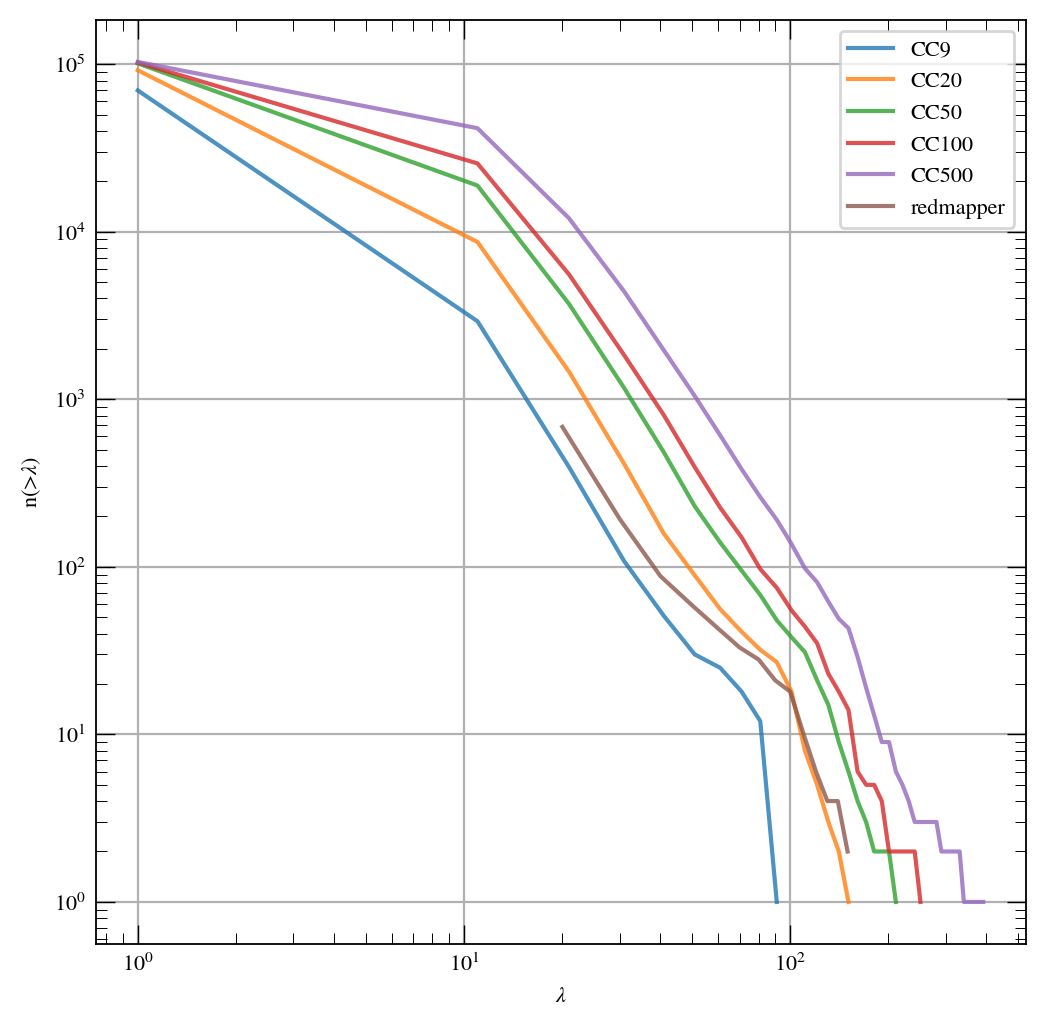

In [38]:
markers = ['o', 's', 'D','^','*', 'X', 'v'] ## , 

def n_greater_than_lambda(data):
    for i in range(len(data)):
        lambda_values = np.arange(data[i].min(), data[i].max(), 10)
#         print(lambda_values)
        n_greater_than_lambda = np.zeros(lambda_values.shape)
        for j in range(len(lambda_values)):
            n_greater_than_lambda[j] = np.count_nonzero(data[i] > lambda_values[j]) #/ len(data[i])
#         print(n_greater_than_lambda)
        plt.yscale('log')
        plt.xscale('log')
        plt.plot(lambda_values, n_greater_than_lambda, label=labels[i], alpha=0.8)

    plt.xlabel('$\lambda$')
    plt.ylabel('n(>$\lambda$)')
#     plt.xlim(20,None)
#     plt.ylim(None,4e3)
    plt.legend()
    plt.show()

# Generate some data
data = [clusterCC9['lam'], clusterCC20['lam'], clusterCC50['lam'], clusterCC100['lam'],clusterCC500['lam'], redmapper_filtd_un['lambda']]
labels = ['CC9', 'CC20', 'CC50', 'CC100', 'CC500', 'redmapper'] ## 'ZC0101', 'ZC0303', 'ZC11'

n_greater_than_lambda(data)


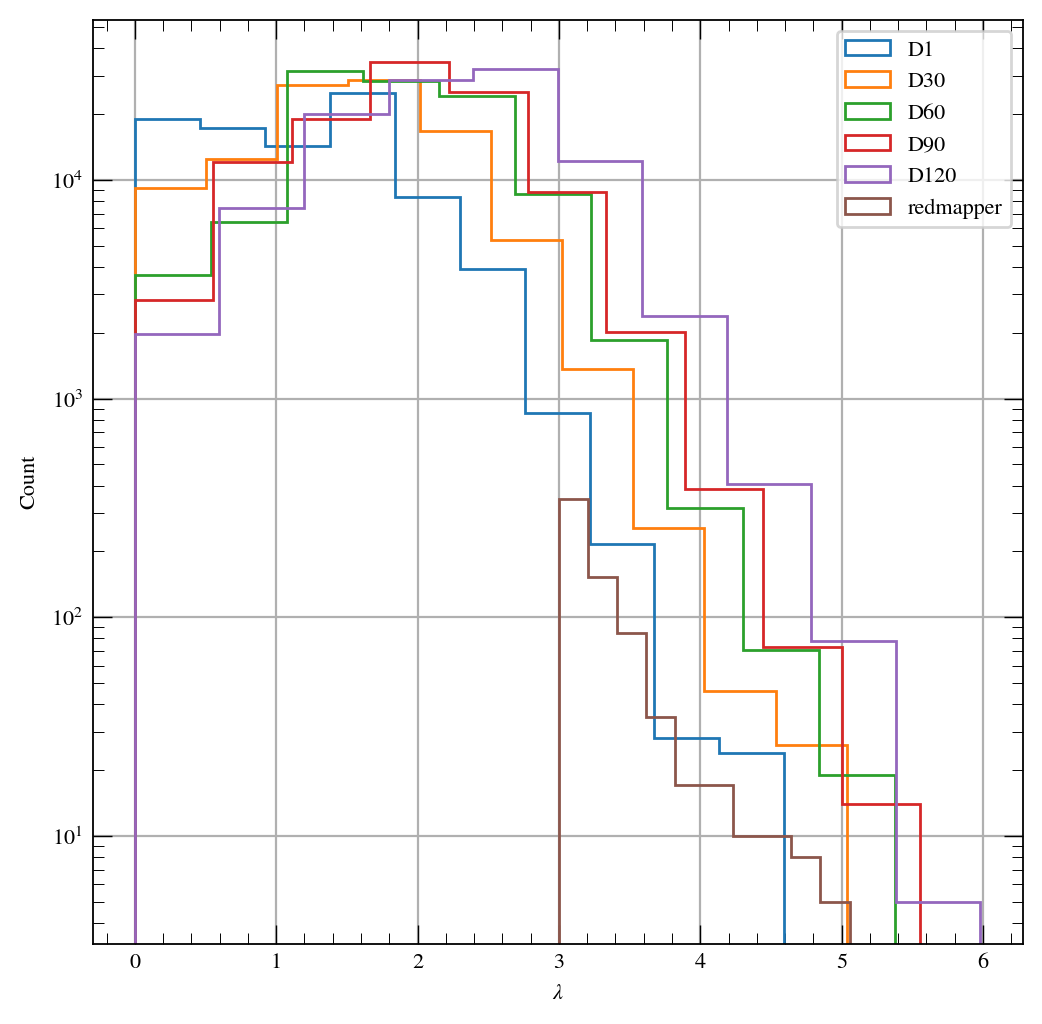

In [39]:
plt.hist(np.log(clusterCC9['lam']), label='D1',  histtype='step')
plt.hist(np.log(clusterCC20['lam']), label='D30', histtype='step')
plt.hist(np.log(clusterCC50['lam']), label='D60', alpha=1, histtype='step')
plt.hist(np.log(clusterCC100['lam']), label='D90',  histtype='step')
plt.hist(np.log(clusterCC500['lam']), label='D120',  histtype='step')
# plt.hist(np.log(clusterZC0101['lam']), label='ZC0101',  histtype='step')
# plt.hist(np.log(clusterZC0303['lam']), label='ZC0303',  histtype='step')
# plt.hist(np.log(clusterZC11['lam']), label='ZC11',  histtype='step')
plt.hist(np.log(redmapper_filtd_un['lambda']), label='redmapper',  histtype='step')

# plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\lambda$')  # Adjusted to put 'lam' on the x-axis
plt.ylabel('Count')
plt.legend()
plt.show()

In [14]:
# cluster_halo_1 = pd.merge(sigma_ds_profile,cluster_1, on='halo_id', how='inner').sort_values(by='lam', ascending=False)
# cluster_halo_30 = pd.merge(sigma_ds_profile,cluster_30, on='halo_id', how='inner').sort_values(by='lam', ascending=False)
# cluster_halo_60 = pd.merge(sigma_ds_profile,cluster_60, on='halo_id', how='inner').sort_values(by='lam', ascending=False)
# cluster_halo_90 = pd.merge(sigma_ds_profile,cluster_90, on='halo_id', how='inner').sort_values(by='lam', ascending=False)
# cluster_halo_120 = pd.merge(sigma_ds_profile,cluster_120, on='halo_id', how='inner').sort_values(by='lam', ascending=False)
# print(len(cluster_halo_1), len(cluster_halo_30),len(cluster_halo_60),len(cluster_halo_90),len(cluster_halo_120))
# print(len(cluster_1), len(cluster_30),len(cluster_60),len(cluster_90),len(cluster_120))


# # Create a figure with subplots
# fig, axes = plt.subplots(1, 4, figsize=(20, 10), sharex=True, sharey=True)

# for lambda_group in sorted(grouped_cl_halos_red.groups.keys(), reverse=True):
#     sel_clusters_red = grouped_cl_halos_red.get_group(lambda_group)
#     lnM_sel_red = np.log10(sel_clusters_red['baseDC2/sod_halo_mass'])
#     z_sel_red = sel_clusters_red['redshift']
#     profile_sel_red = sel_clusters_red['sigma']
#     profile_sel_ds_red = sel_clusters_red['DS']

#     num_clusters_in_bin = len(sel_clusters_red)
    
#     sel_clusters_1 = cluster_halo_1.nlargest(num_clusters_in_bin, 'lam') # Select the top clusters from cluster_halo_30 based on halo_mass
#     # sel_clusters_1 = sel_clusters_1[sel_clusters_1['baseDC2/sod_halo_mass']>0]
#     cluster_halo_1 = cluster_halo_1.drop(sel_clusters_1.index) # Remove the selected clusters from cluster_halo_30 to avoid duplicates
#     lnM_sel_1 = np.log10(sel_clusters_1['baseDC2/sod_halo_mass'])
#     z_sel_1 = sel_clusters_1['redshift_y']
#     profile_sel_1 = sel_clusters_1['sigma']
#     profile_sel_ds_1 = sel_clusters_1['DS']
    
#     sel_clusters_30 = cluster_halo_30.nlargest(num_clusters_in_bin, 'lam') # Select the top clusters from cluster_halo_30 based on halo_mass
#     # sel_clusters_30 = sel_clusters_30[sel_clusters_30['baseDC2/sod_halo_mass']>0]
#     cluster_halo_30 = cluster_halo_30.drop(sel_clusters_30.index) # Remove the selected clusters from cluster_halo_30 to avoid duplicates
#     lnM_sel_30 = np.log10(sel_clusters_30['baseDC2/sod_halo_mass'])
#     # print('{:e}'.format(np.max((sel_clusters_30['baseDC2/sod_halo_mass']))))
#     # print((sel_clusters_30['baseDC2/sod_halo_mass']>1e15).sum())
#     z_sel_30 = sel_clusters_30['redshift_y']
#     profile_sel_30 = sel_clusters_30['sigma']
#     profile_sel_ds_30 = sel_clusters_30['DS']
    
    
#     sel_clusters_60 = cluster_halo_60.nlargest(num_clusters_in_bin, 'lam')
#     # sel_clusters_60 = sel_clusters_60[sel_clusters_60['baseDC2/sod_halo_mass']>0]
#     cluster_halo_60 = cluster_halo_60.drop(sel_clusters_60.index)
#     lnM_sel_60 = np.log10(sel_clusters_60['baseDC2/sod_halo_mass'])
#     z_sel_60 = sel_clusters_60['redshift_y']
#     profile_sel_60 = sel_clusters_60['sigma']
#     profile_sel_ds_60 = sel_clusters_60['DS']

    
#     underlying_halos = sigma_ds_profile[(sigma_ds_profile['redshift']>=0.2) & (sigma_ds_profile['redshift']<0.35)]
#     lnM_All = np.log10(underlying_halos['baseDC2/sod_halo_mass'])
#     z_All = underlying_halos['redshift']
#     profile_All = underlying_halos['sigma']
#     profile_All_ds = underlying_halos['DS']
    
#     # Extract numerical values from redshift and lambda group labels
#     # redshift_value = float(re.findall(r'\d+\.\d+', redshift_group)[0])
#     lambda_value = float(re.findall(r'\d+', lambda_group)[0])
    

#     # Calculate the row and column indices for the subplot
#     col_index = int(lambda_value) // 15 - 1
#     row_index = 2

#     axes[col_index].hist(np.log10(sel_clusters_red['baseDC2/sod_halo_mass']), alpha=0.5, label='redmapper', rwidth=1)
#     axes[col_index].hist(lnM_sel_1, alpha=0.5, label='depth 1', rwidth=1)
#     axes[col_index].hist(lnM_sel_30, alpha=0.5, label='depth 30', rwidth=1)
#     axes[col_index].hist(lnM_sel_60, alpha=0.5, label='depth 60', rwidth=1)
#     axes[col_index].hist(lnM_sel_90, alpha=0.5, label='depth 90', rwidth=1)
#     axes[col_index].hist(lnM_sel_120, alpha=0.5, label='depth 120', rwidth=1)

#     axes[col_index].set_yscale('log')
    
#     axes[0].legend(loc='best')

#     # Set the title inside the subplot
#     title = f'z(0.2,0.35] $\lambda${lambda_group}'
#     title_y = 1.1 if row_index > 3 else 0.9  # Adjust the y position for the last row
#     axes[col_index].set_title(title,  loc='right', y=title_y)


# # Adjust the spacing between subplots
# plt.subplots_adjust(hspace=0, wspace=0)


# # Set the x and y-axis labels for the bottom subplots
# for ax in axes[:]:
#     ax.set_xlabel('Mass') #r [Mpc]

# plt.show()

In [15]:
# cluster_halo_1 = pd.merge(sigma_ds_profile,cluster_1, on='halo_id', how='inner').sort_values(by='lam', ascending=False)
# cluster_halo_1 = cluster_halo_1[cluster_halo_1['baseDC2/sod_halo_mass']>0]
# cluster_halo_30 = pd.merge(sigma_ds_profile,cluster_30, on='halo_id', how='inner').sort_values(by='lam', ascending=False)
# cluster_halo_30 = cluster_halo_30[cluster_halo_30['baseDC2/sod_halo_mass']>0]
# cluster_halo_60 = pd.merge(sigma_ds_profile,cluster_60, on='halo_id', how='inner').sort_values(by='lam', ascending=False)
# cluster_halo_60 = cluster_halo_60[cluster_halo_60['baseDC2/sod_halo_mass']>0]
# cluster_halo_90 = pd.merge(sigma_ds_profile,cluster_90, on='halo_id', how='inner').sort_values(by='lam', ascending=False)
# cluster_halo_90 = cluster_halo_90[cluster_halo_90['baseDC2/sod_halo_mass']>0]
# cluster_halo_120 = pd.merge(sigma_ds_profile,cluster_120, on='halo_id', how='inner').sort_values(by='lam', ascending=False)
# cluster_halo_120 = cluster_halo_120[cluster_halo_120['baseDC2/sod_halo_mass']>0]
# print(len(cluster_halo_1), len(cluster_halo_30),len(cluster_halo_60),len(cluster_halo_90),len(cluster_halo_120))
# print(len(cluster_1), len(cluster_30),len(cluster_60),len(cluster_90),len(cluster_120))

In [16]:
# fig, axes = plt.subplots(1,5, figsize=(10,5))
# axes[0].hist(np.log10(cluster_halo_1['baseDC2/sod_halo_mass']), alpha=0.2, label='D1')
# axes[0].set_yscale('log')
# axes[0].legend()
# axes[1].hist(np.log10(cluster_halo_30['baseDC2/sod_halo_mass']), alpha=0.2, label='D30')
# axes[1].set_yscale('log')
# axes[1].legend()
# axes[2].hist(np.log10(cluster_halo_60['baseDC2/sod_halo_mass']), alpha=0.2, label='D60')
# axes[2].set_yscale('log')
# axes[2].legend()
# axes[3].hist(np.log10(cluster_halo_90['baseDC2/sod_halo_mass']), alpha=0.2, label='D90')
# axes[3].set_yscale('log')
# axes[3].legend()
# axes[4].hist(np.log10(cluster_halo_120['baseDC2/sod_halo_mass']), alpha=0.2, label='D120')
# plt.yscale('log')
# plt.legend()
# plt.show()

In [17]:
# fig, axes = plt.subplots(1,4, figsize=(10,5))
# axes[0].hist(np.log10(cluster_halo_30['mass']), alpha=0.2)
# axes[0].set_yscale('log')
# axes[1].hist(np.log10(cluster_halo_60['mass']), alpha=0.2)
# axes[1].set_yscale('log')
# axes[2].hist(np.log10(cluster_halo_90['mass']), alpha=0.2)
# axes[2].set_yscale('log')
# axes[3].hist(np.log10(cluster_halo_120['mass']), alpha=0.2)
# plt.yscale('log')

In [18]:
# fig, axes = plt.subplots(1,4, figsize=(10,5))
# axes[0].hist(np.log10(cluster_30['mass']), alpha=0.2)
# axes[0].set_yscale('log')
# axes[1].hist(np.log10(cluster_60['mass']), alpha=0.2)
# axes[1].set_yscale('log')
# axes[2].hist(np.log10(cluster_90['mass']), alpha=0.2)
# axes[2].set_yscale('log')
# axes[3].hist(np.log10(cluster_120['mass']), alpha=0.2)
# plt.yscale('log')

In [19]:
# fig, axes = plt.subplots(1,4, figsize=(10,5))
# axes[0].hist(np.log10(cluster_halo_30['halo_mass']), alpha=0.2)
# axes[0].set_yscale('log')
# axes[1].hist(np.log10(cluster_halo_60['halo_mass']), alpha=0.2)
# axes[1].set_yscale('log')
# axes[2].hist(np.log10(cluster_halo_90['halo_mass']), alpha=0.2)
# axes[2].set_yscale('log')
# axes[3].hist(np.log10(cluster_halo_120['halo_mass']), alpha=0.2)
# plt.yscale('log')